In [ ]:
#color_correction_matrix_2

In [1]:
import sys
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pyproj import CRS
try:
    from osgeo import ogr, osr, gdal
except:
    sys.exit('ERROR: cannot find GDAL/OGR modules')

In [2]:
def tif2array(input_file, dtype=np.uint8):
    """
    read GeoTiff and convert to numpy array.
    inputs:
        input_file (str) : the name of input GeoTiff file.
    return:
        image(np.array) : image for each bands
        dataset : for gdal's data drive.
    """
    dataset = gdal.Open(input_file, gdal.GA_ReadOnly)

    if dataset is None:
        return None

    # Allocate our array using the first band's datatype
    image_datatype = dataset.GetRasterBand(1).DataType
    image = np.zeros((dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
                     dtype=dtype)

    # Loop over all bands in dataset
    for b in range(dataset.RasterCount):
        # Remember, GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
        band = dataset.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        image[:, :, b] = band.ReadAsArray()#buf_type=gdalconst.GDT_Byte)

    #image = image[2:-2,2:-2,:]

    return image

In [3]:
path_0 = "/media/philipp/DATA/2018_wien/ortho/tile_ortho_335960.tif"
path_1 = "/media/philipp/DATA/2017_mariazell/ortho/tile_ortho_300744.tif"
path_ccm = "/home/philipp/Data/edin_diss/ccm/ColorCorrectionMatrix_04_mariazell.npy"

img_0 = tif2array(path_0, dtype=np.uint8)
img_1 = tif2array(path_1, dtype=np.uint8)

ccm = np.load(path_ccm)

In [9]:
img_1.shape

(515, 515, 4)

In [11]:
ccm

array([[            nan,             nan,             nan,
                    nan,  1.38334862e-16],
       [            nan,             nan,             nan,
                    nan,  3.21964677e-15],
       [            nan,             nan,             nan,
                    nan, -1.56819002e-15],
       [            nan,             nan,             nan,
                    nan, -8.32667268e-16],
       [            nan,             nan,             nan,
                    nan,  1.00000000e+00]])

In [5]:

# reshape image to 
img_1_res = img_1/255
img_1_res = img_1_res.reshape((-1,4))
img_1_resh = np.ones((img_1_res.shape[0],img_1_res.shape[1]+1))
img_1_resh[:,:-1] = img_1_res
img_3_resh = np.matmul(img_1_resh, ccm)

In [6]:
img_3_res = img_3_resh[:,:4]
img_3 = img_3_res.reshape((515,515,4))
img_3 = img_3*255
img_3 = img_3.astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 514.5, 514.5, -0.5)

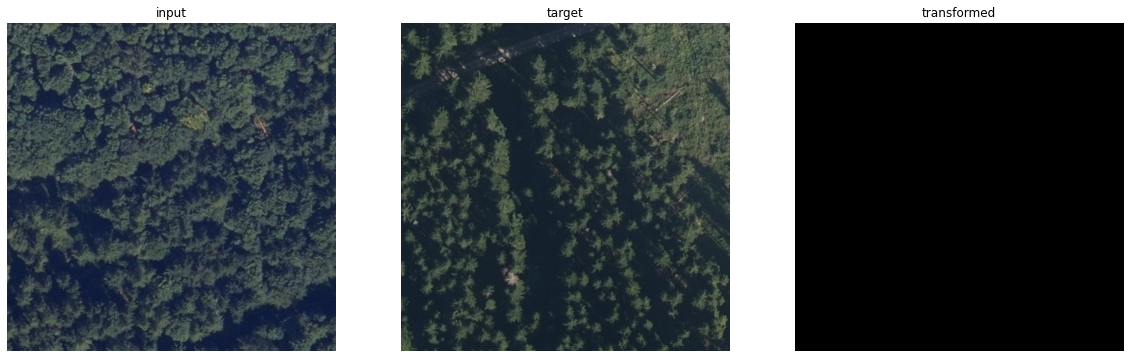

In [7]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img_0[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(img_1[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(img_3[:,:,:3])
a.set_title('transformed')
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 514.5, 514.5, -0.5)

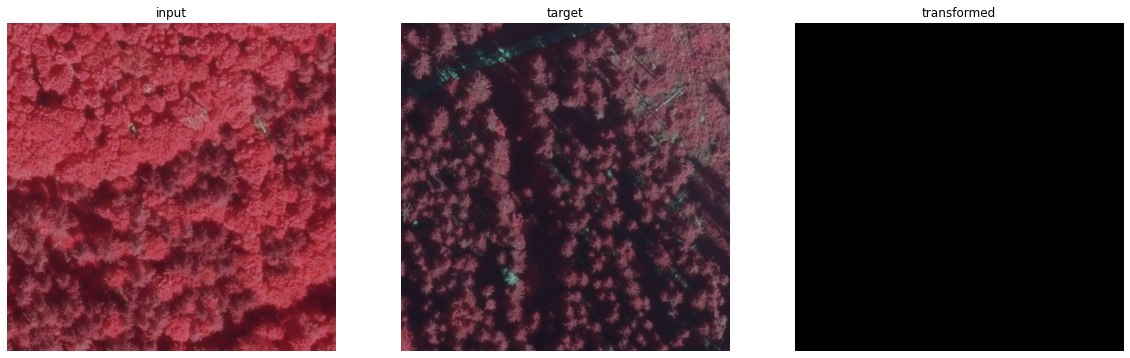

In [8]:
fig = plt.figure(figsize=(20,20))
        
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(np.roll(img_0, 1, axis=2)[:,:,:3])
a.set_title('input')
plt.axis('off')

a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(np.roll(img_1, 1, axis=2)[:,:,:3])
a.set_title('target')
plt.axis('off')

a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(np.roll(img_3, 1, axis=2)[:,:,:3])
a.set_title('transformed')
plt.axis('off')